<center><h1>Clustering_in_Image_Processing </h1></center>

---



## **K-means clustering**

The purpose of this workshop is to introduce you to the **k-means** clustering algorithm and its implementation in the **Sklearn** module, which is widely used in academia as well as in industry.

In real-world clustering applications, we do not have any ground truth category information about the samples; otherwise, it would fall under the category of supervised learning. Thus, our goal is to group the samples based on their feature similarities.

First, we will create a dataset consisting of 150 randomly generated points that are roughly grouped into three regions with high density, visualized through a two-dimensional scatter plot.

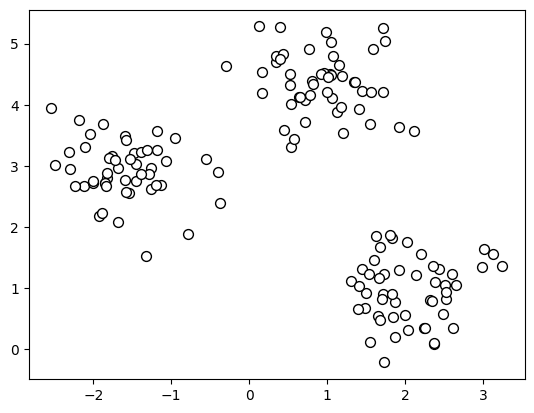

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

We set the desired number of clusters to **3**. We specify **n_init = 10** to run the k-means clustering algorithm 10 times independently with different random centroids, selecting the final model as the one with the lowest SSE (Sum of Squared Errors).

Finally, the **max_iter** parameter specifies the maximum number of iterations for each run (here, 300).

Lastly, we predict the cluster labels, **y_km**.

In [2]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300
)

y_km = km.fit_predict(X)
y_km

array([2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2,
       0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2], dtype=int32)

In [3]:
X

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

Now that we have predicted the cluster labels **y_km**, let’s visualize the clusters identified by our k-means algorithm in the dataset along with the cluster centroids. These centroids are stored in the **cluster_centers_** attribute of the **KMeans** object:

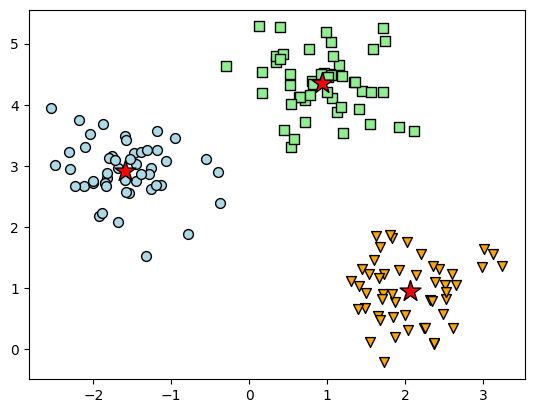

In [4]:
colors=["lightgreen","lightblue","orange"]
mark=["s","o","v"]

for i in range(3):
  lab="cluster"+str(i)
  plt.scatter(
    X[y_km==i][:,0], X[y_km==i][:,1],
    s=50, c=colors[i],
    marker=mark[i], edgecolor='black',
    label=lab
  )

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

## **Elbow Method**

The elbow method is a useful graphical tool for estimating the optimal number of clusters, **k**, for a given task. Intuitively, as **k** increases, the intra-cluster SSE ("distortion") will decrease because the samples will be closer to the centroids to which they are assigned.

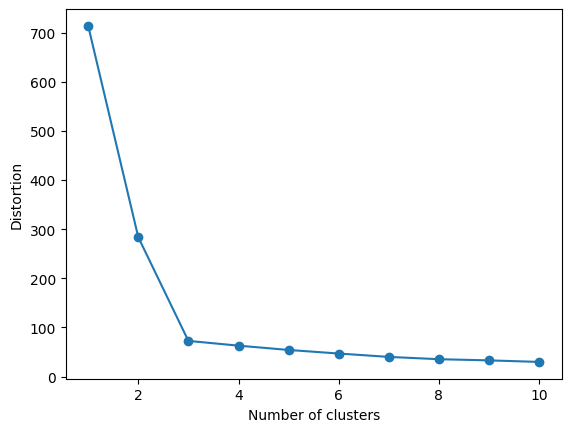

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As we can see in the resulting plot, the elbow is located at **k = 3**, which confirms that **k = 3** is indeed a good choice for this dataset.

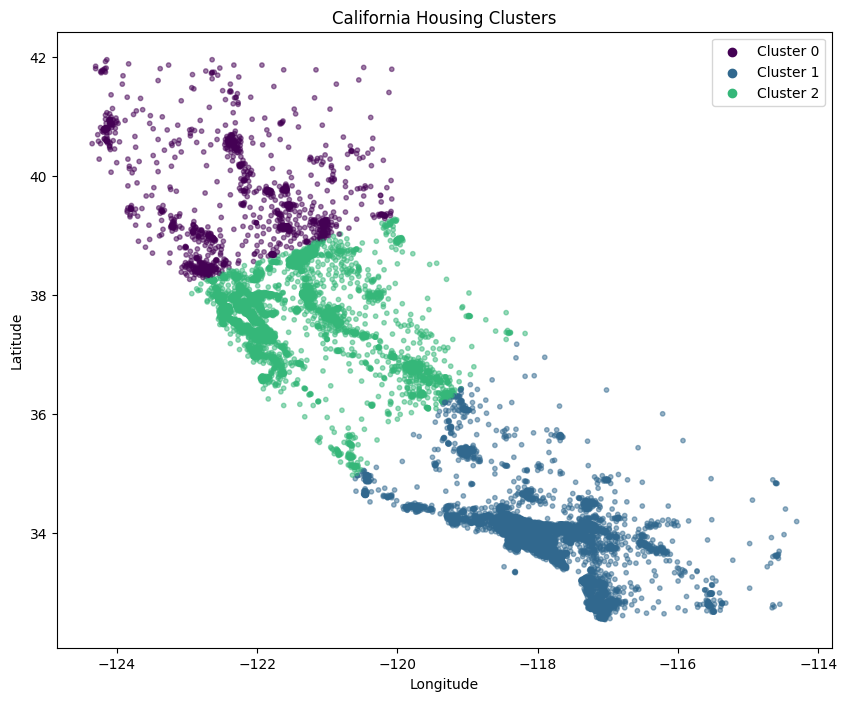

In [6]:
import pandas as pd
import numpy as np

# Load the training and testing datasets
train_df = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Combine the datasets for clustering
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Extract longitude and latitude
X = combined_df[['longitude', 'latitude']]

# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Get colors for scatter plot
colors = plt.cm.viridis(labels / kmeans.n_clusters)  # Get colors for data points

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(
    X['longitude'],
    X['latitude'],
    c=colors,  # Use the colors array
    s=10,
    alpha=0.5
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Clusters')

# Add a legend with matching colors
for i in range(kmeans.n_clusters):
    plt.scatter([], [], c=[plt.cm.viridis(i / kmeans.n_clusters)], label=f'Cluster {i}')
plt.legend()

plt.show()